## Predict diamond prices w linear regression in Python
## 1.0 Problem and purpose
## 2.0 Data
## 3.0 Challenges and approach
## 4.0 Development
### 4.1 Understand data
### 4.2 Pre-process data
### 4.3 Build model and evaluate
## 5.0 Results discussion
## 6.0 Conclusion

In [2]:
# Set-up libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Read-in daata into dataframe
df = pd.read_csv('../00-datasets/diamonds.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Check for missing values
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
# Check for duplicate values
df.duplicated().sum()

0

In [10]:
# Explore tabular summary
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


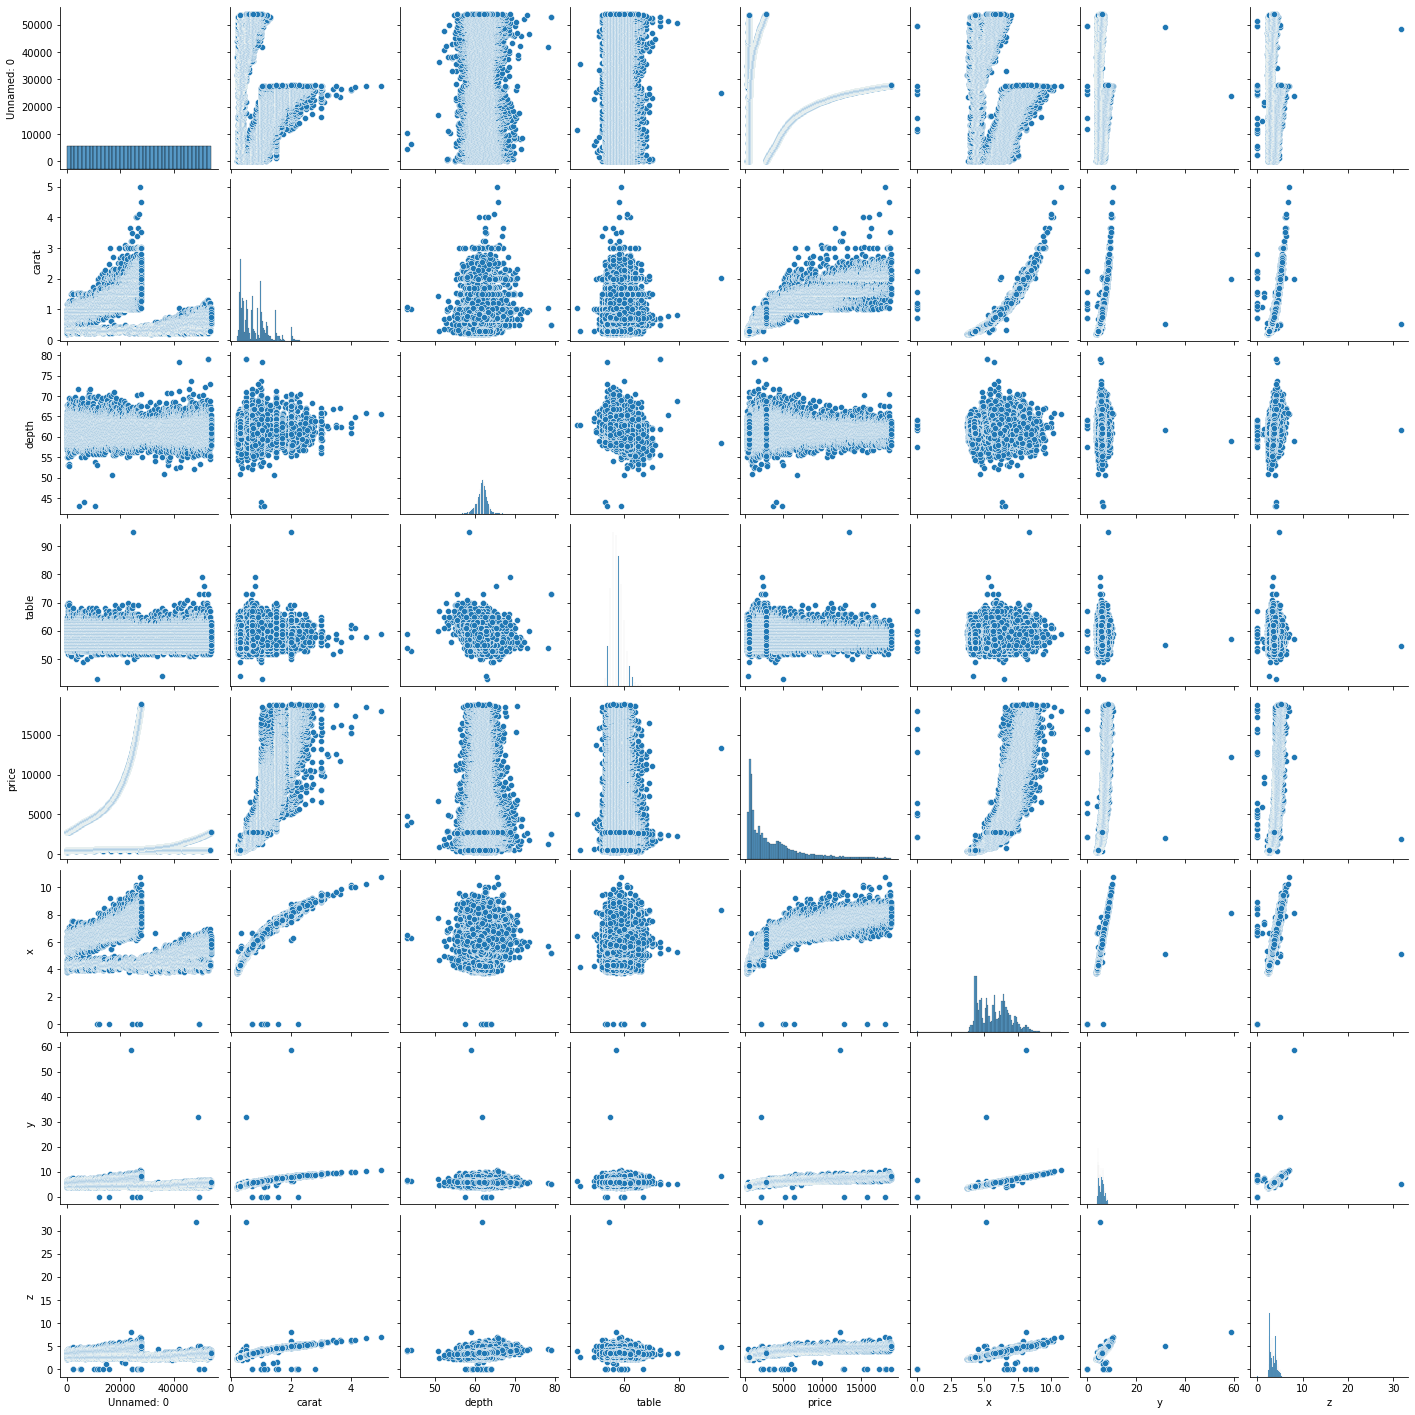

In [11]:
# Explore visual summaries
sns.pairplot(df)

In [13]:
# Split dataset into 80% train and 20% test sets
X = df['carat'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Build model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Feed validation data to model
y_predict = model.predict(X_val)

# Compare predictions to actual values
actual_vs_predict = pd.DataFrame({'Actual':y_val.flatten(), 'Prediction':y_predict.flatten()})
actual_vs_predict.sample(12)

,Actual,Prediction
4791,1574,1701.620799
8958,5301,5651.701657
4753,1338,1779.073365
9281,7130,5961.511920
4855,485,-467.051044
4889,1163,1701.620799
7233,2021,2321.241326
6667,6548,5961.511920
7537,16407,13242.053107
2608,9702,9369.424816


In [26]:
# Evaluate model
model.score(X_val, y_val)

0.8515758113126248

## Notes
In this section, I note the choices and assumptions I made.
* Quickly checked for missing and duplicate values in the data. No filtering steps and no additional preprocessing performed.
* Assumed 'carat' feature is a good predictor of the 'price' feature. These features were assigned accordingly to variables X and y, predictor and target.
* The dataset was split into 80% train and 20% test sets. * No validation set was created or used. No hyperparameter tuning occurred.
* Model was evaluated using R-squared or coefficient determination metric only. The best possible score is 1.0 and the worst could drop below zero. 